In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

In [37]:
# Access Disaster Declaation Summary Data from FEMA
url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"

params = "$filter=state eq 'NC' and (declarationDate ge '2018-01-01T00:00:00.000z' and declarationDate le '2022-12-31T23:59:59.000z')"  # restrict query to NC disasters only MDS1

                             
disasterDeclarationSummaries=requests.get(url,params)
disasterDeclarationSummariesJson = disasterDeclarationSummaries.json()

In [38]:
#Print data in JSON format to inspect. There are 25 attributes
print(json.dumps(disasterDeclarationSummariesJson,indent=4))

{
    "metadata": {
        "skip": 0,
        "filter": "state eq 'NC' and (declarationDate ge '2018-01-01T00%3A00%3A00.000z' and declarationDate le '2022-12-31T23%3A59%3A59.000z')",
        "orderby": "",
        "select": null,
        "rundate": "2024-05-12T23:11:52.102Z",
        "top": 1000,
        "format": "json",
        "metadata": true,
        "entityname": "DisasterDeclarationsSummaries",
        "version": "v2",
        "url": "/api/open/v2/DisasterDeclarationsSummaries?$filter=state%20eq%20'NC'%20and%20(declarationDate%20ge%20'2018-01-01T00:00:00.000z'%20and%20declarationDate%20le%20'2022-12-31T23:59:59.000z')",
        "count": 0
    },
    "DisasterDeclarationsSummaries": [
        {
            "femaDeclarationString": "DR-4617-NC",
            "disasterNumber": 4617,
            "state": "NC",
            "declarationType": "DR",
            "declarationDate": "2021-09-08T00:00:00.000Z",
            "fyDeclared": 2021,
            "incidentType": "Hurricane",
      

In [39]:
# Total number of records - 1000
disasterList = disasterDeclarationSummariesJson['DisasterDeclarationsSummaries']
len(disasterList)

779

In [40]:
# Except Disaster closing date and lastIAFilingDate , rest of the attributes quality is good
disasterDF=pd.DataFrame(disasterList)
print('Disaster Summary Data Frame Details ')
print('Size  # ', disasterDF.shape)
print(' Columns # ',disasterDF.columns)
disasterDF.info()

Disaster Summary Data Frame Details 
Size  #  (779, 25)
 Columns #  Index(['femaDeclarationString', 'disasterNumber', 'state', 'declarationType',
       'declarationDate', 'fyDeclared', 'incidentType', 'declarationTitle',
       'ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared',
       'hmProgramDeclared', 'incidentBeginDate', 'incidentEndDate',
       'disasterCloseoutDate', 'tribalRequest', 'fipsStateCode',
       'fipsCountyCode', 'placeCode', 'designatedArea',
       'declarationRequestNumber', 'lastIAFilingDate', 'lastRefresh', 'hash',
       'id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   femaDeclarationString     779 non-null    object
 1   disasterNumber            779 non-null    int64 
 2   state                     779 non-null    object
 3   declarationType          

In [41]:
# Unique list of States in the dataset.
disasterDF['state'].unique()

array(['NC'], dtype=object)

In [42]:
disasterDF.loc[disasterDF['state']=='NC']

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id
0,DR-4617-NC,4617,NC,DR,2021-09-08T00:00:00.000Z,2021,Hurricane,REMNANTS OF TROPICAL STORM FRED,False,False,...,False,37,009,99009,Ashe (County),21095,2021-11-08T00:00:00.000Z,2023-05-22T03:41:22.800Z,d8428cce89ae3a975abd756e7f74eea492d72774,45e6ea8c-d8a0-427d-922f-b48e69d44b0b
1,DR-4617-NC,4617,NC,DR,2021-09-08T00:00:00.000Z,2021,Hurricane,REMNANTS OF TROPICAL STORM FRED,False,False,...,False,37,011,99011,Avery (County),21095,2021-11-08T00:00:00.000Z,2023-05-22T03:41:22.800Z,7e378086b55b81251b15512a9900959a76edfb1c,2f220a04-3af8-4894-a375-48968a0fd367
2,DR-4617-NC,4617,NC,DR,2021-09-08T00:00:00.000Z,2021,Hurricane,REMNANTS OF TROPICAL STORM FRED,False,False,...,False,37,075,99075,Graham (County),21095,2021-11-08T00:00:00.000Z,2023-05-22T03:41:22.800Z,1e64ced267228bc7e128ae87979f88d47a2121a0,5960ec56-1948-44a7-b7b5-b3fca109ac27
3,DR-4617-NC,4617,NC,DR,2021-09-08T00:00:00.000Z,2021,Hurricane,REMNANTS OF TROPICAL STORM FRED,False,False,...,False,37,099,99099,Jackson (County),21095,2021-11-08T00:00:00.000Z,2023-05-22T03:41:22.800Z,322449aad8836a09a2b8142c9d9591f5de7ad57c,3abbca08-91a3-40b5-bb7a-6676cb3771b2
4,DR-4617-NC,4617,NC,DR,2021-09-08T00:00:00.000Z,2021,Hurricane,REMNANTS OF TROPICAL STORM FRED,False,False,...,False,37,115,99115,Madison (County),21095,2021-11-08T00:00:00.000Z,2023-05-22T03:41:22.800Z,bbe206777418399b9cd4df15057f162af09e25fc,a8e042a7-4144-4ee4-a889-5daf8cdc5d74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,EM-3423-NC,3423,NC,EM,2019-09-03T00:00:00.000Z,2019,Hurricane,HURRICANE DORIAN,False,False,...,False,37,191,99191,Wayne (County),19077,None,2023-09-28T23:41:12.686Z,99ad225253ec79384dbb0de2e3ded4ef0039c34a,280edacd-b31b-4ef2-966f-5ae6a54943b0
775,EM-3423-NC,3423,NC,EM,2019-09-03T00:00:00.000Z,2019,Hurricane,HURRICANE DORIAN,False,False,...,False,37,193,99193,Wilkes (County),19077,None,2023-09-28T23:41:12.686Z,580bf06f5bce284b1049b4e98e9d11aa4666d61e,9403d958-c19a-46a0-95e9-b82376a0d8ac
776,EM-3423-NC,3423,NC,EM,2019-09-03T00:00:00.000Z,2019,Hurricane,HURRICANE DORIAN,False,False,...,False,37,195,99195,Wilson (County),19077,None,2023-09-28T23:41:12.686Z,9cdce5dca4d46142de6913e61ef03c87b2e066bd,f73226f9-deab-4c80-9ca4-089a06ec5b6e
777,EM-3423-NC,3423,NC,EM,2019-09-03T00:00:00.000Z,2019,Hurricane,HURRICANE DORIAN,False,False,...,False,37,197,99197,Yadkin (County),19077,None,2023-09-28T23:41:12.686Z,3d828c0167072a72bbd1925785f41b0414f774b8,b5fa6bf7-c0e7-4fee-836c-897d76f67736


In [43]:
# Another view - Disaster count by state.
disasterDF.groupby('state')['disasterNumber'].count()

state
NC    779
Name: disasterNumber, dtype: int64

In [44]:
print(disasterDF.groupby('declarationDate')['disasterNumber'].count())

declarationDate
2018-05-08T00:00:00.000Z      2
2018-09-10T00:00:00.000Z    101
2018-09-14T00:00:00.000Z     52
2019-01-31T00:00:00.000Z     21
2019-09-03T00:00:00.000Z    101
2019-10-04T00:00:00.000Z     28
2020-03-13T00:00:00.000Z    101
2020-03-25T00:00:00.000Z    106
2020-05-08T00:00:00.000Z     19
2020-08-02T00:00:00.000Z    101
2020-10-14T00:00:00.000Z     16
2021-03-03T00:00:00.000Z     19
2021-09-08T00:00:00.000Z     11
2022-10-01T00:00:00.000Z    101
Name: disasterNumber, dtype: int64


In [45]:
# PIVOT Table that shows the Date/State and Count 
disasterPivot = pd.pivot_table(disasterDF,values=['disasterNumber'],index=['declarationDate','state'],aggfunc={'disasterNumber':'count'})
disasterPivot.shape
display(disasterPivot.head(200))
display(disasterPivot.sort_values('declarationDate',ascending=False))
disasterPivot.sort_values('disasterNumber',ascending=False)

,,disasterNumber
declarationDate,state,
2018-05-08T00:00:00.000Z,NC,2
2018-09-10T00:00:00.000Z,NC,101
2018-09-14T00:00:00.000Z,NC,52
2019-01-31T00:00:00.000Z,NC,21
2019-09-03T00:00:00.000Z,NC,101
2019-10-04T00:00:00.000Z,NC,28
2020-03-13T00:00:00.000Z,NC,101
2020-03-25T00:00:00.000Z,NC,106
2020-05-08T00:00:00.000Z,NC,19


,,disasterNumber
declarationDate,state,
2022-10-01T00:00:00.000Z,NC,101
2021-09-08T00:00:00.000Z,NC,11
2021-03-03T00:00:00.000Z,NC,19
2020-10-14T00:00:00.000Z,NC,16
2020-08-02T00:00:00.000Z,NC,101
2020-05-08T00:00:00.000Z,NC,19
2020-03-25T00:00:00.000Z,NC,106
2020-03-13T00:00:00.000Z,NC,101
2019-10-04T00:00:00.000Z,NC,28


,,disasterNumber
declarationDate,state,
2020-03-25T00:00:00.000Z,NC,106
2018-09-10T00:00:00.000Z,NC,101
2019-09-03T00:00:00.000Z,NC,101
2020-03-13T00:00:00.000Z,NC,101
2020-08-02T00:00:00.000Z,NC,101
2022-10-01T00:00:00.000Z,NC,101
2018-09-14T00:00:00.000Z,NC,52
2019-10-04T00:00:00.000Z,NC,28
2019-01-31T00:00:00.000Z,NC,21


<Axes: xlabel='state'>

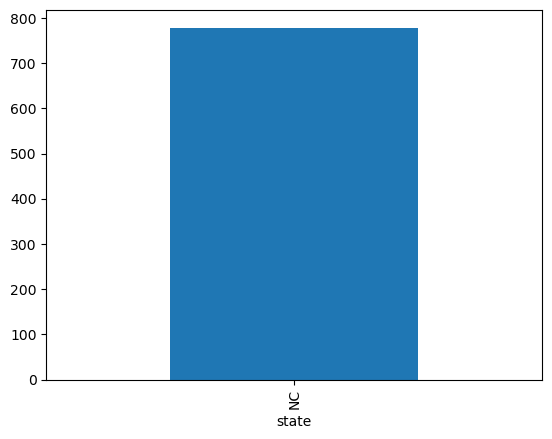

In [46]:
disasterDF.groupby('state')['disasterNumber'].count().plot(kind='bar')
# TO DO 
# Horizontal Bar Graph is preferred.
# Square Acerage / Population

#disasterDF.plot(kind='bar',title="Disaster Dataframe by State and Year",x='declarationDate') #,y='declarationDate',figsize=(100,100))

[2021 2020 2019 2018 2022]


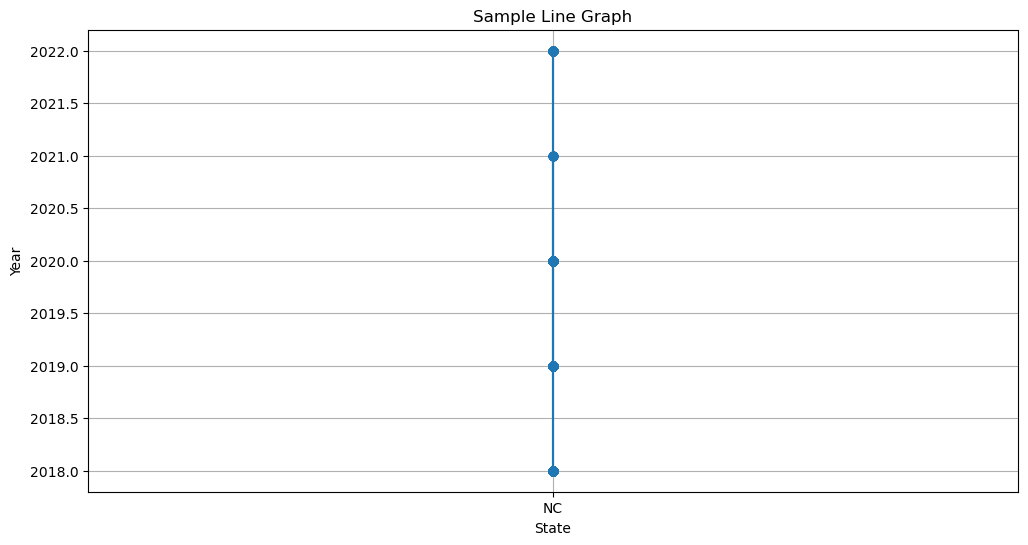

In [47]:
#disasterDF.plot(kind='scatter',x='state',y='declarationDate',subplots=True,figsize=(200,300))

#disasterDF['year']=

disasterDF['Date'] = pd.to_datetime(disasterDF['declarationDate'])
disasterDF['Year']= disasterDF['Date'].dt.year

print(disasterDF['Year'].unique())

#disasterDF.plot(x='state',y='Year',kind='scatter',figsize=(75,25))

plt.figure(figsize=(12, 6))
plt.plot(disasterDF['state'], disasterDF['Year'], marker='o', linestyle='-')
plt.title('Sample Line Graph')
plt.xlabel('State')
plt.ylabel('Year')
plt.grid(True)
plt.show()

# Seaborn Charts

# Area , Population , Disasters , Economic Elements & Health

In [48]:
import datetime as dt

disasterDF.set_index(disasterDF['declarationDate'])

disasterDF

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id,Date,Year
0,DR-4617-NC,4617,NC,DR,2021-09-08T00:00:00.000Z,2021,Hurricane,REMNANTS OF TROPICAL STORM FRED,False,False,...,009,99009,Ashe (County),21095,2021-11-08T00:00:00.000Z,2023-05-22T03:41:22.800Z,d8428cce89ae3a975abd756e7f74eea492d72774,45e6ea8c-d8a0-427d-922f-b48e69d44b0b,2021-09-08 00:00:00+00:00,2021
1,DR-4617-NC,4617,NC,DR,2021-09-08T00:00:00.000Z,2021,Hurricane,REMNANTS OF TROPICAL STORM FRED,False,False,...,011,99011,Avery (County),21095,2021-11-08T00:00:00.000Z,2023-05-22T03:41:22.800Z,7e378086b55b81251b15512a9900959a76edfb1c,2f220a04-3af8-4894-a375-48968a0fd367,2021-09-08 00:00:00+00:00,2021
2,DR-4617-NC,4617,NC,DR,2021-09-08T00:00:00.000Z,2021,Hurricane,REMNANTS OF TROPICAL STORM FRED,False,False,...,075,99075,Graham (County),21095,2021-11-08T00:00:00.000Z,2023-05-22T03:41:22.800Z,1e64ced267228bc7e128ae87979f88d47a2121a0,5960ec56-1948-44a7-b7b5-b3fca109ac27,2021-09-08 00:00:00+00:00,2021
3,DR-4617-NC,4617,NC,DR,2021-09-08T00:00:00.000Z,2021,Hurricane,REMNANTS OF TROPICAL STORM FRED,False,False,...,099,99099,Jackson (County),21095,2021-11-08T00:00:00.000Z,2023-05-22T03:41:22.800Z,322449aad8836a09a2b8142c9d9591f5de7ad57c,3abbca08-91a3-40b5-bb7a-6676cb3771b2,2021-09-08 00:00:00+00:00,2021
4,DR-4617-NC,4617,NC,DR,2021-09-08T00:00:00.000Z,2021,Hurricane,REMNANTS OF TROPICAL STORM FRED,False,False,...,115,99115,Madison (County),21095,2021-11-08T00:00:00.000Z,2023-05-22T03:41:22.800Z,bbe206777418399b9cd4df15057f162af09e25fc,a8e042a7-4144-4ee4-a889-5daf8cdc5d74,2021-09-08 00:00:00+00:00,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,EM-3423-NC,3423,NC,EM,2019-09-03T00:00:00.000Z,2019,Hurricane,HURRICANE DORIAN,False,False,...,191,99191,Wayne (County),19077,None,2023-09-28T23:41:12.686Z,99ad225253ec79384dbb0de2e3ded4ef0039c34a,280edacd-b31b-4ef2-966f-5ae6a54943b0,2019-09-03 00:00:00+00:00,2019
775,EM-3423-NC,3423,NC,EM,2019-09-03T00:00:00.000Z,2019,Hurricane,HURRICANE DORIAN,False,False,...,193,99193,Wilkes (County),19077,None,2023-09-28T23:41:12.686Z,580bf06f5bce284b1049b4e98e9d11aa4666d61e,9403d958-c19a-46a0-95e9-b82376a0d8ac,2019-09-03 00:00:00+00:00,2019
776,EM-3423-NC,3423,NC,EM,2019-09-03T00:00:00.000Z,2019,Hurricane,HURRICANE DORIAN,False,False,...,195,99195,Wilson (County),19077,None,2023-09-28T23:41:12.686Z,9cdce5dca4d46142de6913e61ef03c87b2e066bd,f73226f9-deab-4c80-9ca4-089a06ec5b6e,2019-09-03 00:00:00+00:00,2019
777,EM-3423-NC,3423,NC,EM,2019-09-03T00:00:00.000Z,2019,Hurricane,HURRICANE DORIAN,False,False,...,197,99197,Yadkin (County),19077,None,2023-09-28T23:41:12.686Z,3d828c0167072a72bbd1925785f41b0414f774b8,b5fa6bf7-c0e7-4fee-836c-897d76f67736,2019-09-03 00:00:00+00:00,2019


In [49]:
# What's the range of dates for which disaster data is available here
print(f'We have collected {len(disasterDF)} disaster records.')
print(f'These are dated from {min(disasterDF["declarationDate"])} to {max(disasterDF["declarationDate"])}.')

We have collected 779 disaster records.
These are dated from 2018-05-08T00:00:00.000Z to 2022-10-01T00:00:00.000Z.
